In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

import japanize_matplotlib

# 色テーマ指定
plt.style.use("ggplot")

# 外観

In [2]:
df = pd.read_csv("room.csv", encoding="cp932")
df.head()

,近さ,家賃,間取り,大きさ,方角,築年数
0,B,68000,1K,19,西,12
1,B,68000,1K,19,南,12
2,B,69000,1K,19,北西,14
3,B,70000,1K,19,南,14
4,B,72000,1K,15,南,9


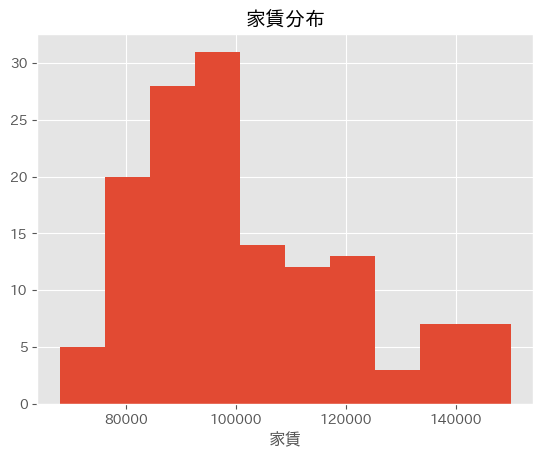

In [3]:
plt.hist(df["家賃"])
plt.xlabel("家賃")
plt.title("家賃分布")
plt.show()

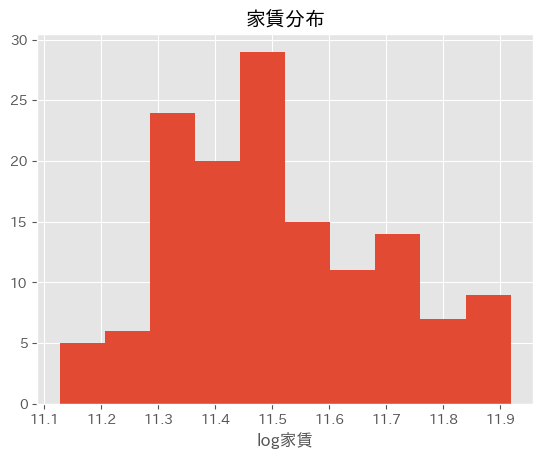

In [4]:
plt.hist(np.log(df["家賃"]))
plt.xlabel("log家賃")
plt.title("家賃分布")
plt.show()

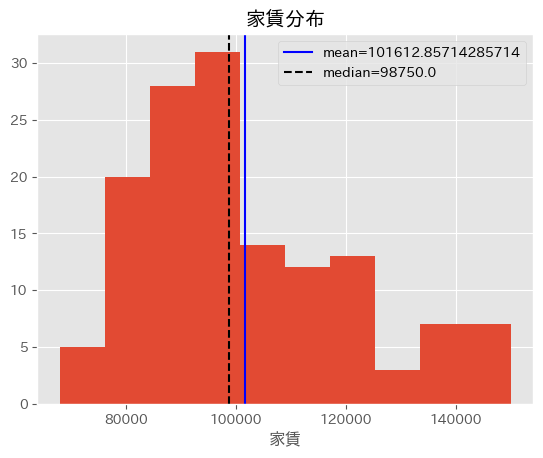

In [5]:
plt.hist(df["家賃"])
plt.axvline(df["家賃"].mean(), c="blue", label=f"mean={df['家賃'].mean()}")
plt.axvline(df["家賃"].median(), c="black", ls="--", label=f"median={df['家賃'].median()}")
plt.xlabel("家賃")
plt.title("家賃分布")
plt.legend()
plt.show()

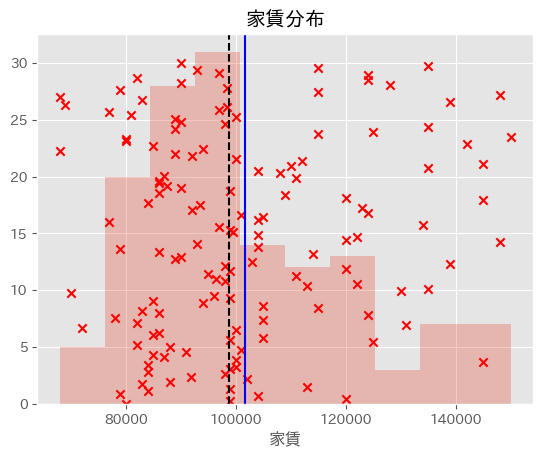

In [6]:
plt.hist(df["家賃"], alpha=0.3)
plt.axvline(df["家賃"].mean(), c="blue", label=f"mean={df['家賃'].mean()}")
plt.axvline(df["家賃"].median(), c="black", ls="--", label=f"median={df['家賃'].median()}")

np.random.seed(123)
plt.scatter(df["家賃"], np.random.permutation(np.linspace(0, 30, len(df))), marker="x", c="red")

plt.xlabel("家賃")
plt.title("家賃分布")
# plt.legend()
plt.show()

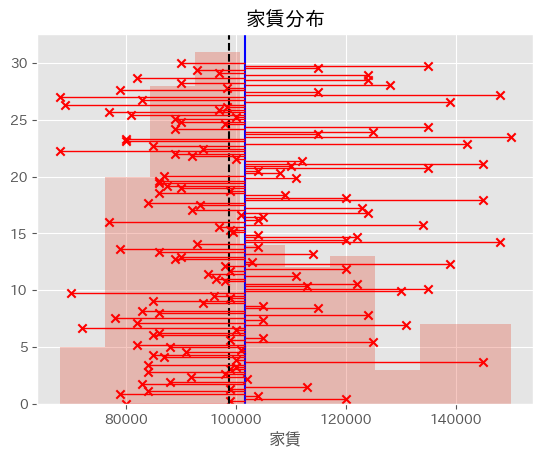

In [7]:
plt.hist(df["家賃"], alpha=0.3)
plt.axvline(df["家賃"].mean(), c="blue", label=f"mean={df['家賃'].mean()}")
plt.axvline(df["家賃"].median(), c="black", ls="--", label=f"median={df['家賃'].median()}")

np.random.seed(123)
plt.scatter(df["家賃"], np.random.permutation(np.linspace(0, 30, len(df))), marker="x", c="red")

np.random.seed(123)
plt.hlines(np.random.permutation(np.linspace(0, 30, len(df))), df["家賃"].mean(), df["家賃"], colors="red", lw=1)


plt.xlabel("家賃")
plt.title("家賃分布")
# plt.legend()
plt.show()

# 単回帰

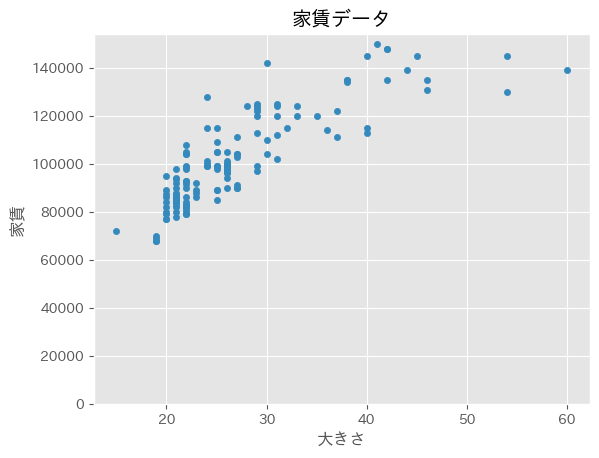

In [8]:
df.plot.scatter(x="大きさ", y="家賃")
plt.title("家賃データ")
plt.ylim(0,None)
plt.show()

In [9]:
ols1 = sm.OLS.from_formula("家賃 ~ 大きさ", data=df).fit()
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     家賃   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     334.0
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.14e-38
Time:                        15:01:24   Log-Likelihood:                -1493.4
No. Observations:                 140   AIC:                             2991.
Df Residuals:                     138   BIC:                             2997.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.579e+04   3179.976     14.400      0.000    3.95e+04    5.21e+04
大きさ         2075.1455    113.553     18.275      0.000    1850.617    2299.674
==============================================================================
Omnibus:                        6.374   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.691
Skew:                           0.352   Prob(JB):                       0.0352
Kurtosis:                       3.808   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

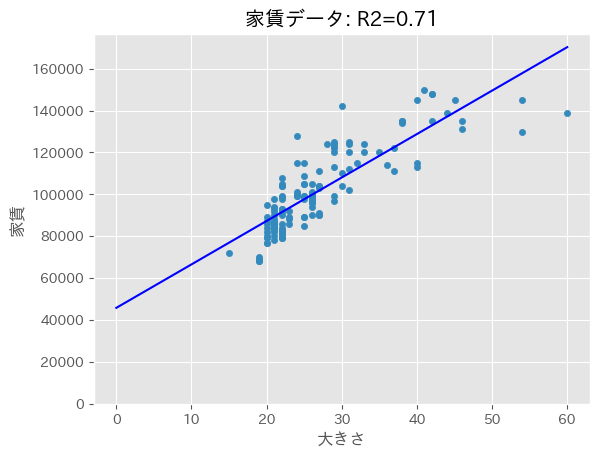

In [10]:
x_lin = np.linspace(0,60)

df.plot.scatter(x="大きさ", y="家賃")
plt.plot(x_lin, ols1.predict({"大きさ":x_lin}), c="blue")
plt.title("家賃データ: R2={:.2f}".format(ols1.rsquared))
plt.ylim(0,None)
plt.show()

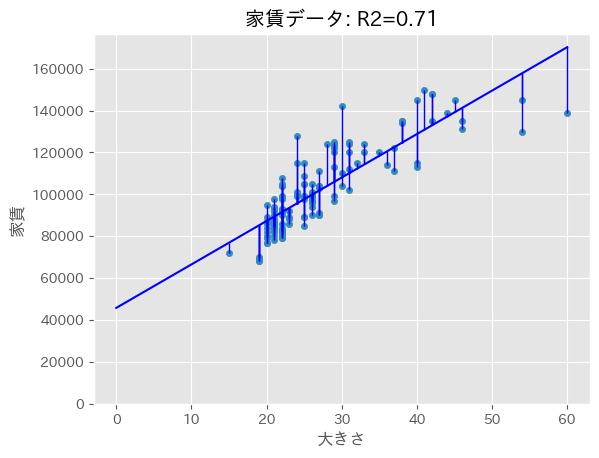

In [11]:
x_lin = np.linspace(0,60)

df.plot.scatter(x="大きさ", y="家賃")
plt.plot(x_lin, ols1.predict({"大きさ":x_lin}), c="blue")

plt.vlines(df["大きさ"], ols1.predict(), ols1.model.endog, colors="blue", lw=1)

plt.title("家賃データ: R2={:.2f}".format(ols1.rsquared))
plt.ylim(0,None)
plt.show()

# 重回帰

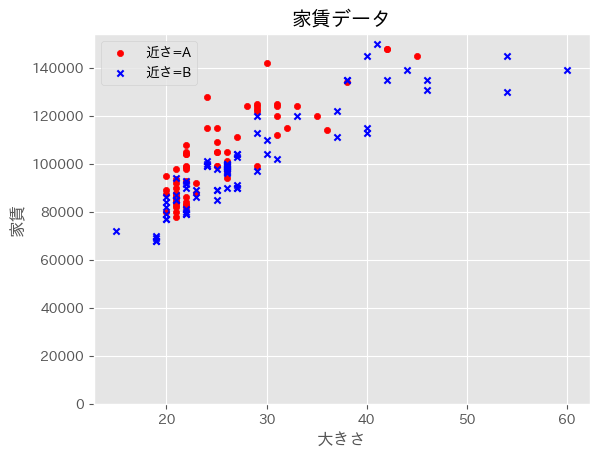

In [12]:
ax = df[df["近さ"]=="A"].plot.scatter(x="大きさ", y="家賃", label="近さ=A", color="red")
df[df["近さ"]=="B"].plot.scatter(x="大きさ", y="家賃", label="近さ=B", color="blue", marker="x", ax=ax)
plt.title("家賃データ")
plt.ylim(0,None)
plt.show()

In [13]:
ols2 = sm.OLS.from_formula("家賃 ~ 大きさ + 近さ", data=df).fit()
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     家賃   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     216.9
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           3.55e-43
Time:                        15:01:26   Log-Likelihood:                -1479.6
No. Observations:                 140   AIC:                             2965.
Df Residuals:                     137   BIC:                             2974.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.757e+04   2910.072     16.348      0.000    4.18e+04    5.33e+04
近さ[T.B]    -8934.1895   1634.441     -5.466      0.000   -1.22e+04   -5702.194
大きさ         2177.3425    104.940     20.748      0.000    1969.831    2384.854
==============================================================================
Omnibus:                        3.774   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.152   Jarque-Bera (JB):                3.881
Skew:                           0.179   Prob(JB):                        0.144
Kurtosis:                       3.733   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

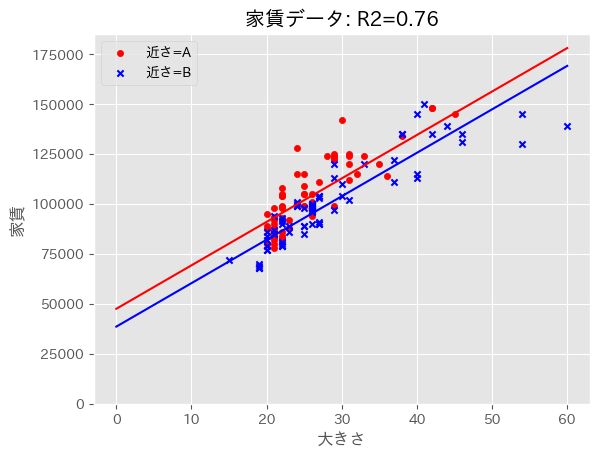

In [14]:
ax = df[df["近さ"]=="A"].plot.scatter(x="大きさ", y="家賃", label="近さ=A", color="red")
df[df["近さ"]=="B"].plot.scatter(x="大きさ", y="家賃", label="近さ=B", color="blue", marker="x", ax=ax)

plt.plot(x_lin, ols2.predict({"大きさ":x_lin, "近さ":["A"]*len(x_lin)}), c="red")
plt.plot(x_lin, ols2.predict({"大きさ":x_lin, "近さ":["B"]*len(x_lin)}), c="blue")
plt.title("家賃データ: R2={:.2f}".format(ols2.rsquared))

plt.ylim(0,None)
plt.show()

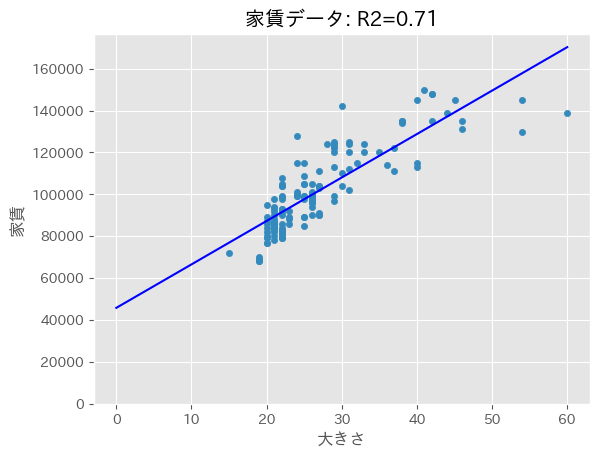

In [15]:
x_lin = np.linspace(0,60)

df.plot.scatter(x="大きさ", y="家賃")
plt.plot(x_lin, ols1.predict({"大きさ":x_lin}), c="blue")
plt.title("家賃データ: R2={:.2f}".format(ols1.rsquared))
plt.ylim(0,None)
plt.show()